In [1]:
!pip install -q ccxt statsmodels ta

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
from crypto_modules import fetch_ohlc, preprocess_ohlcv_data, predict_classifier

In [6]:
df = fetch_ohlc(coin_name='BTC/USDT', date_since='2021-04-24')

Warning call 2 has packet loss:
Expected 288 packets but 232 were received.
Warning call 3 has packet loss:
Expected 288 packets but 99 were received.


In [7]:
df[0]

,Open,High,Low,Close,Volume
date,,,,,
2021-04-24 00:00:00,51110.56,51166.22,50765.30,50806.54,411.819758
2021-04-24 00:05:00,50806.54,50879.13,50648.49,50675.00,239.939246
2021-04-24 00:10:00,50675.00,50878.18,50445.57,50766.81,341.664066
2021-04-24 00:15:00,50766.82,50771.48,50457.20,50470.00,173.507136
2021-04-24 00:20:00,50470.01,50545.48,50300.00,50435.29,282.530450
...,...,...,...,...,...
2021-04-26 07:50:00,52891.36,52891.37,52755.11,52766.75,301.919121
2021-04-26 07:55:00,52766.75,52882.83,52700.00,52801.37,258.541683
2021-04-26 08:00:00,52801.37,52981.07,52650.71,52654.09,436.157064


In [10]:
df = (df[0]
                .resample(rule='5min')
                .asfreq()
                .interpolate(method='time', limit=None))

<AxesSubplot:xlabel='date'>

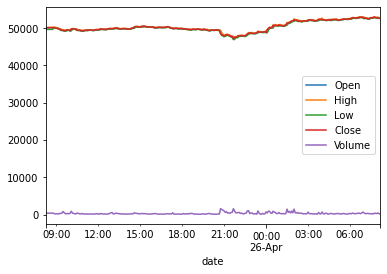

In [12]:
df.iloc[-288:, ].plot()

In [8]:
df[0].to_csv('test_data.csv')

In [13]:
# df = pd.read_csv('data/btc_2021-04-01_2021-04-23_5m.csv', index_col=['date'], parse_dates=['date'])
# df = df.iloc[-288:, :]
# df = pd.concat([df, df],axis=0)
pre_df = preprocess_ohlcv_data(raw_data=df.iloc[-288:, ], scale_fn='saved_models/column_scale_v1.joblib')

/usr/local/lib/python3.6/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.6/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [14]:
prediction = predict_classifier(preprocessed_data=pre_df, feature_names_path='saved_models/feature_list_v9.joblib', model_path='saved_models/classification_model_BTC_v9.joblib')

In [15]:
prediction[0]

0.9789220404139266

In [7]:
(prediction[:] - 0.5) / 0.5

array([0.01225413])

In [31]:
(0.47 - 0.5) / 0.5

-0.06000000000000005

In [1]:
!python crypto_predictions.py

2021-03-16 15:12:56: Model Prediction: 0.3623044553011287.


In [17]:
import pandas as pd
import numpy as np

pred = 1
ts = pd.to_datetime('today')
m = 123

pd.DataFrame({
    'ts': [ts],
    'm': [m],
    'p': [pred]
})

,ts,m,p
0,2021-03-17 12:24:30.829454,123,1


In [18]:
pd.to_datetime('today')

Timestamp('2021-03-17 12:24:38.625263')

In [2]:
!pip freeze

absl-py==0.9.0
aiodns==2.0.0
aiohttp==3.7.4.post0
asn1crypto==0.24.0
astunparse==1.6.3
async-timeout==3.0.1
attrs==19.3.0
backcall==0.2.0
bleach==3.1.5
cachetools==4.1.1
ccxt==1.43.40
certifi==2020.6.20
cffi==1.14.5
chardet==3.0.4
cryptography==3.4.6
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
gast==0.3.3
google-auth==1.19.2
google-auth-oauthlib==0.4.1
google-pasta==0.2.0
grpcio==1.30.0
h5py==2.10.0
idna==2.6
idna-ssl==1.1.0
importlib-metadata==1.7.0
ipykernel==5.1.1
ipython==7.16.1
ipython-genutils==0.2.0
ipywidgets==7.5.1
jedi==0.17.2
Jinja2==2.11.2
joblib==0.16.0
jsonschema==3.2.0
jupyter==1.0.0
jupyter-client==6.1.6
jupyter-console==6.1.0
jupyter-core==4.6.3
jupyter-http-over-ws==0.0.8
jupyterthemes==0.20.0
Keras-Preprocessing==1.1.2
keyring==10.6.0
keyrings.alt==3.0
kiwisolver==1.2.0
lesscpy==0.14.0
lightgbm==3.0.0
llvmlite==0.34.0
Markdown==3.2.2
MarkupSafe==1.1.1
matplotlib==3.3.0
mistune==0.8.4
multidict==5.1.0
nbconvert==5.6.1
nbformat==4.4.0
notebook==6